Title: "Linear Algebra for Machine Learning: Part 2 -Matrices"

## Introduction
* Linear algebra serves as the foundation for many machine learning algorithms and techniques.
* Linear Algebra is the branch of mathematics that studies vector spaces and linear transformations between vector spaces, such as rotating a shape, scaling it up or down, translating it (i.e. moving it), etc.
* In this blog post, we will try to understand vectors from their base representation, their properties and the various operations we can perform on vectors.

## Matrices
A matrix is a rectangular array of scalars (i.e. any number: integer, real or complex) arranged in rows and columns, for example:

\begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}

* You can also think of a matrix as a list of vectors: the previous matrix contains either 2 horizontal 3D vectors or 3 vertical 2D vectors.

* Matrices are convenient and very efficient to run operations on many vectors at a time.
* We will also see that they are great at representing and performing linear transformations such rotations, translations and scaling.

### 1. Representation
In python, a matrix can be represented in various ways. The simplest is just a list of python lists:

In [1]:
[
    [10, 20, 30],
    [40, 50, 60]
]

[[10, 20, 30], [40, 50, 60]]

A much more efficient way is to use the NumPy library which provides optimized implementations of many matrix operations:

In [2]:
import numpy as np

A = np.array([
    [10,20,30],
    [40,50,60]
])
A

array([[10, 20, 30],
       [40, 50, 60]])

By convention matrices generally have uppercase names, such as $A$.

In the rest of this tutorial, we will assume that we are using NumPy arrays (type `ndarray`) to represent matrices.

Size:

- The size of a matrix is defined by its number of rows and number of columns.
- It is denoted as $rows \times columns$. For example, the matrix $A$ mentioned above is a $2 \times 3$ matrix, indicating 2 rows and 3 columns.
- Similarly, a $3 \times 2$ matrix would have 3 rows and 2 columns.

To determine the size of a matrix in NumPy:

In [3]:
A.shape

(2, 3)

the `size` attribute represents the number of elements in the `ndarray`, not the matrix's size:

In [4]:
A.size

6

### 2. Element indexing
The number located in the $i^{th}$ row and $j^{th}$ column of a matrix $X$ is sometimes denoted as $X_{i,j}$ or $X_{ij}$. However, since there is no standard notation, people often prefer to explicitly name the elements. For example, "*let $X = (x_{i,j})_{1 ≤ i ≤ m, 1 ≤ j ≤ n}$*" means that $X$ is equal to:

$X = \begin{bmatrix}
  x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
  x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
  x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$

However, in this notebook, we will use the $X_{i,j}$ notation, as it aligns well with NumPy's notation.
* It is important to note that in mathematics, indices generally start at 1, while in programming, they usually start at 0.
* Therefore, to access $A_{2,3}$ programmatically, we would write the following:

In [5]:
A[1,2]  # 2nd row, 3rd column

60

To access $A_{2,*}$ (i.e. $A$'s 2nd row vector):

In [6]:
A[1, :]  # 2nd row vector (as a 1D array)

array([40, 50, 60])

To access $A_{*,3}$ (i.e. $A$'s 3rd column vector):

In [7]:
A[:, 2]  # 3rd column vector (as a 1D array)

array([30, 60])

* Note that the result is actually a one-dimensional NumPy array: there is no such thing as a *vertical* or *horizontal* one-dimensional array.
* If you need to actually represent a row vector as a one-row matrix (i.e. a 2D NumPy array), or a column vector as a one-column matrix, then you need to use a slice instead of an integer when accessing the row or column, for example:

To access $A_{2,*}$ (i.e. $A$'s 2nd row vector) as a 2D Numpy Array:

In [8]:
A[1:2, :]  # rows 2 to 3 (excluded): this returns row 2 as a one-row matrix

array([[40, 50, 60]])

To access $A_{*,3}$ (i.e. $A$'s 3rd column vector) as a 2D Numpy Array:

In [9]:
A[:, 2:3]  # columns 3 to 4 (excluded): this returns column 3 as a one-column matrix

array([[30],
       [60]])

### 3. Square, triangular, diagonal and identity matrices
A **square matrix** is a matrix that has the same number of rows and columns, for example a $3 \times 3$ matrix:

\begin{bmatrix}
  4 & 9 & 2 \\
  3 & 5 & 7 \\
  8 & 1 & 6
\end{bmatrix}

An **upper triangular matrix** is a special kind of square matrix where all the elements *below* the main diagonal (top-left to bottom-right) are zero, for example:

\begin{bmatrix}
  4 & 9 & 2 \\
  0 & 5 & 7 \\
  0 & 0 & 6
\end{bmatrix}

Similarly, a **lower triangular matrix** is a square matrix where all elements *above* the main diagonal are zero, for example:

\begin{bmatrix}
  4 & 0 & 0 \\
  3 & 5 & 0 \\
  8 & 1 & 6
\end{bmatrix}

A **triangular matrix** is one that is either lower triangular or upper triangular.

A matrix that is both upper and lower triangular is called a **diagonal matrix**, for example:

\begin{bmatrix}
  4 & 0 & 0 \\
  0 & 5 & 0 \\
  0 & 0 & 6
\end{bmatrix}

You can construct a diagonal matrix using NumPy's `diag` function:

In [10]:
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

If you pass a matrix to the `diag` function, it will happily extract the diagonal values:

In [11]:
D = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])
np.diag(D)

array([1, 5, 9])

Finally, the **identity matrix** of size $n$, noted $I_n$, is a diagonal matrix of size $n \times n$ with $1$'s in the main diagonal, for example $I_3$:

\begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix}

Numpy's `eye` function returns the identity matrix of the desired size:

In [12]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

The identity matrix is often noted simply $I$ (instead of $I_n$) when its size is clear given the context. It is called the *identity* matrix because multiplying a matrix with it leaves the matrix unchanged as we will see below.

### 4. Adding matrices
If two matrices $Q$ and $R$ have the same size $m \times n$, they can be added together. Addition is performed *elementwise*: the result is also an $m \times n$ matrix $S$ where each element is the sum of the elements at the corresponding position: $S_{i,j} = Q_{i,j} + R_{i,j}$

$S =
\begin{bmatrix}
  Q_{11} + R_{11} & Q_{12} + R_{12} & Q_{13} + R_{13} & \cdots & Q_{1n} + R_{1n} \\
  Q_{21} + R_{21} & Q_{22} + R_{22} & Q_{23} + R_{23} & \cdots & Q_{2n} + R_{2n}  \\
  Q_{31} + R_{31} & Q_{32} + R_{32} & Q_{33} + R_{33} & \cdots & Q_{3n} + R_{3n}  \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  Q_{m1} + R_{m1} & Q_{m2} + R_{m2} & Q_{m3} + R_{m3} & \cdots & Q_{mn} + R_{mn}  \\
\end{bmatrix}$

For example, let's create a $2 \times 3$ matrix $B$ and compute $A + B$:

In [13]:
B = np.array([[1, 2, 3], [4, 5, 6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [15]:
A + B

array([[11, 22, 33],
       [44, 55, 66]])

**Addition is *commutative***, meaning that $A + B = B + A$:

In [16]:
B + A

array([[11, 22, 33],
       [44, 55, 66]])

**It is also *associative***, meaning that $A + (B + C) = (A + B) + C$:

In [17]:
C = np.array([[100, 200, 300], [400, 500, 600]])

A + (B + C)

array([[111, 222, 333],
       [444, 555, 666]])

In [18]:
(A + B) + C

array([[111, 222, 333],
       [444, 555, 666]])

### 5. Scalar multiplication
A matrix $M$ can be multiplied by a scalar $\lambda$. The result is noted $\lambda M$, and it is a matrix of the same size as $M$ with all elements multiplied by $\lambda$:

$\lambda M =
\begin{bmatrix}
  \lambda \times M_{11} & \lambda \times M_{12} & \lambda \times M_{13} & \cdots & \lambda \times M_{1n} \\
  \lambda \times M_{21} & \lambda \times M_{22} & \lambda \times M_{23} & \cdots & \lambda \times M_{2n} \\
  \lambda \times M_{31} & \lambda \times M_{32} & \lambda \times M_{33} & \cdots & \lambda \times M_{3n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  \lambda \times M_{m1} & \lambda \times M_{m2} & \lambda \times M_{m3} & \cdots & \lambda \times M_{mn} \\
\end{bmatrix}$

A more concise way of writing this is:

$(\lambda M)_{i,j} = \lambda (M)_{i,j}$

In NumPy, simply use the `*` operator to multiply a matrix by a scalar. For example:

In [19]:
2 * A

array([[ 20,  40,  60],
       [ 80, 100, 120]])

Scalar multiplication is also defined on the right-hand side, and gives the same result: $M \lambda = \lambda M$. For example:

In [20]:
A * 2

array([[ 20,  40,  60],
       [ 80, 100, 120]])

This makes scalar multiplication **commutative**.

It is also **associative**, meaning that $\alpha (\beta M) = (\alpha \times \beta) M$, where $\alpha$ and $\beta$ are scalars. For example:

In [21]:
2 * (3 * A)

array([[ 60, 120, 180],
       [240, 300, 360]])

In [22]:
(2 * 3) * A

array([[ 60, 120, 180],
       [240, 300, 360]])

Finally, it is **distributive over addition** of matrices, meaning that $\lambda (Q + R) = \lambda Q + \lambda R$:

In [23]:
2 * (A + B)

array([[ 22,  44,  66],
       [ 88, 110, 132]])

In [24]:
2 * A + 2 * B

array([[ 22,  44,  66],
       [ 88, 110, 132]])

### 6. Matrix multiplication
So far, matrix operations have been rather intuitive. But multiplying matrices is a bit more involved.

A matrix $Q$ of size $m \times n$ can be multiplied by a matrix $R$ of size $n \times q$. It is noted simply $QR$ without multiplication sign or dot. The result $P$ is an $m \times q$ matrix where each element is computed as a **sum of products**:

$P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$

The element at position $i,j$ in the resulting matrix is the sum of the products of elements in row $i$ of matrix $Q$ by the elements in column $j$ of matrix $R$.

$P =
\begin{bmatrix}
Q_{11} R_{11} + Q_{12} R_{21} + \cdots + Q_{1n} R_{n1} &
  Q_{11} R_{12} + Q_{12} R_{22} + \cdots + Q_{1n} R_{n2} &
    \cdots &
      Q_{11} R_{1q} + Q_{12} R_{2q} + \cdots + Q_{1n} R_{nq} \\
Q_{21} R_{11} + Q_{22} R_{21} + \cdots + Q_{2n} R_{n1} &
  Q_{21} R_{12} + Q_{22} R_{22} + \cdots + Q_{2n} R_{n2} &
    \cdots &
      Q_{21} R_{1q} + Q_{22} R_{2q} + \cdots + Q_{2n} R_{nq} \\
  \vdots & \vdots & \ddots & \vdots \\
Q_{m1} R_{11} + Q_{m2} R_{21} + \cdots + Q_{mn} R_{n1} &
  Q_{m1} R_{12} + Q_{m2} R_{22} + \cdots + Q_{mn} R_{n2} &
    \cdots &
      Q_{m1} R_{1q} + Q_{m2} R_{2q} + \cdots + Q_{mn} R_{nq}
\end{bmatrix}$

You may notice that each element $P_{i,j}$ is the **dot product** of the row vector $Q_{i,*}$ and the column vector $R_{*,j}$:

$P_{i,j} = Q_{i,*} \cdot R_{*,j}$

So we can rewrite $P$ more concisely as:

$P =
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}$


Let's multiply two matrices in NumPy, using `ndarray`'s `np.matmul()` function:

$E = AD = \begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}
\begin{bmatrix}
  2 & 3 & 5 & 7 \\
  11 & 13 & 17 & 19 \\
  23 & 29 & 31 & 37
\end{bmatrix} =
\begin{bmatrix}
  930 & 1160 & 1320 & 1560 \\
  2010 & 2510 & 2910 & 3450
\end{bmatrix}$

In [25]:
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
E = np.matmul(A, D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

Python 3.5 [introduced](https://docs.python.org/3/whatsnew/3.5.html#pep-465-a-dedicated-infix-operator-for-matrix-multiplication) the `@` infix operator for matrix multiplication, and NumPy 1.10 added support for it. `A @ D` is equivalent to `np.matmul(A, D)`:

In [26]:
A @ D

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

The `@` operator also works for vectors. `u @ v` computes the dot product of `u` and `v`:

In [27]:
u = np.array([2, 5])
v = np.array([3, 1])
u @ v

11

Let's check this result by looking at one element, just to be sure. To calculate $E_{2,3}$ for example, we need to multiply elements in $A$'s $2^{nd}$ row by elements in $D$'s $3^{rd}$ column, and sum up these products:

In [28]:
40*5 + 50*17 + 60*31

2910

In [29]:
E[1,2]  # row 2, column 3

2910

Looks good! You can check the other elements until you get used to the algorithm.

We multiplied a $2 \times 3$ matrix by a $3 \times 4$ matrix, so the result is a $2 \times 4$ matrix. The first matrix's number of columns has to be equal to the second matrix's number of rows. If we try to multiply $D$ by $A$, we get an error because D has 4 columns while A has 2 rows:

In [30]:
try:
    D @ A
except ValueError as e:
    print("ValueError:", e)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 4)


This illustrates the fact that **matrix multiplication is *NOT* commutative**: in general $QR ≠ RQ$.

In fact, $QR$ and $RQ$ are only *both* defined if $Q$ has size $m \times n$ and $R$ has size $n \times m$. Let's look at an example where both *are* defined and show that they are (in general) *NOT* equal:

In [31]:
F = np.array([
        [5,2],
        [4,1],
        [9,3]
    ])
A @ F

array([[400, 130],
       [940, 310]])

In [32]:
F @ A

array([[130, 200, 270],
       [ 80, 130, 180],
       [210, 330, 450]])

On the other hand, **matrix multiplication *is* associative**, meaning that $Q(RS) = (QR)S$. Let's create a $4 \times 5$ matrix $G$ to illustrate this:

In [33]:
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2]])
(A @ D) @ G     # (AD)G

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

In [34]:
A @ (D @ G)     # A(DG)

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

It is also ***distributive* over addition** of matrices, meaning that $(Q + R)S = QS + RS$. For example:

In [35]:
(A + B) @ D

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

In [36]:
A @ D + B @ D

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

The product of a matrix $M$ by the identity matrix (of matching size) results in the same matrix $M$. More formally, if $M$ is an $m \times n$ matrix, then:

$M I_n = I_m M = M$

This is generally written more concisely (since the size of the identity matrices is unambiguous given the context):

$MI = IM = M$

For example:

In [37]:
A @ np.eye(3)

array([[10., 20., 30.],
       [40., 50., 60.]])

In [38]:
np.eye(2) @ A

array([[10., 20., 30.],
       [40., 50., 60.]])

**Caution**: NumPy's `*` operator performs elementwise multiplication, *NOT* a matrix multiplication:

In [39]:
A * B   # NOT a matrix multiplication

array([[ 10,  40,  90],
       [160, 250, 360]])

### 7. Matrix transpose
The transpose of a matrix $M$ is a matrix noted $M^T$ such that the $i^{th}$ row in $M^T$ is equal to the $i^{th}$ column in $M$:

$ A^T =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$

In other words, ($A^T)_{i,j}$ = $A_{j,i}$

Obviously, if $M$ is an $m \times n$ matrix, then $M^T$ is an $n \times m$ matrix.

Note: there are a few other notations, such as $M^t$, $M′$, or ${^t}M$.

In NumPy, a matrix's transpose can be obtained simply using the `T` attribute:

In [40]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [41]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

As you might expect, transposing a matrix twice returns the original matrix:

In [42]:
A.T.T

array([[10, 20, 30],
       [40, 50, 60]])

Transposition is distributive over addition of matrices, meaning that $(Q + R)^T = Q^T + R^T$. For example:

In [43]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [44]:
A.T + B.T

array([[11, 44],
       [22, 55],
       [33, 66]])

Moreover, $(Q \cdot R)^T = R^T \cdot Q^T$. Note that the order is reversed. For example:

In [45]:
(A @ D).T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [46]:
D.T @ A.T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

A **symmetric matrix** $M$ is defined as a matrix that is equal to its transpose: $M^T = M$. This definition implies that it must be a square matrix whose elements are symmetric relative to the main diagonal, for example:

\begin{bmatrix}
  17 & 22 & 27 & 49 \\
  22 & 29 & 36 & 0 \\
  27 & 36 & 45 & 2 \\
  49 & 0 & 2 & 99
\end{bmatrix}

The product of a matrix by its transpose is always a symmetric matrix, for example:

In [47]:
D @ D.T  #results in symmetric matrix

array([[  87,  279,  547],
       [ 279,  940, 1860],
       [ 547, 1860, 3700]])

### 8. Converting 1D arrays to 2D arrays in NumPy
As mentioned earlier, in NumPy (as opposed to Matlab, for example), 1D really means 1D: there is no such thing as a vertical 1D-array or a horizontal 1D-array. So you should not be surprised to see that transposing a 1D array does not do anything:

In [48]:
u

array([2, 5])

In [49]:
u.T

array([2, 5])

We want to convert $\textbf{u}$ into a row vector before transposing it. There are a few ways to do this:

In [50]:
u_row = np.array([u])
u_row

array([[2, 5]])

Notice the extra square brackets: this is a 2D array with just one row (i.e. a $1 \times 2$ matrix). In other words, it really is a **row vector**.

In [51]:
u[np.newaxis, :]

array([[2, 5]])

This is quite explicit: we are asking for a new vertical axis, keeping the existing data as the horizontal axis.

In [52]:
u[np.newaxis]

array([[2, 5]])

This is equivalent, but a little less explicit.

In [53]:
u[None]

array([[2, 5]])

This is the shortest version, but you probably want to avoid it because it is unclear. The reason it works is that `np.newaxis` is actually equal to `None`, so this is equivalent to the previous version.

Ok, now let's transpose our row vector:

In [54]:
u_row.T

array([[2],
       [5]])

Great! We now have a nice **column vector**.

Rather than creating a row vector then transposing it, it is also possible to convert a 1D array directly into a column vector:

In [55]:
u[:, np.newaxis]

array([[2],
       [5]])

The above means:
* keep existing elements `:` on the row axis. We have two elements in `u` so we will end up with 2 rows.
* create a `np.newaxis` for the column axis. We will end up with 1 new column axis.
* In the end, the reuslt is a 2D column vector with 2 rows x 1 column.


### 9. Plotting a matrix
We have already seen that vectors can be represented as points or arrows in N-dimensional space. Is there a good graphical representation of matrices? Well you can simply see a matrix as a list of vectors, so plotting a matrix results in many points or arrows. For example, let's create a $2 \times 4$ matrix `P` and plot it as points:

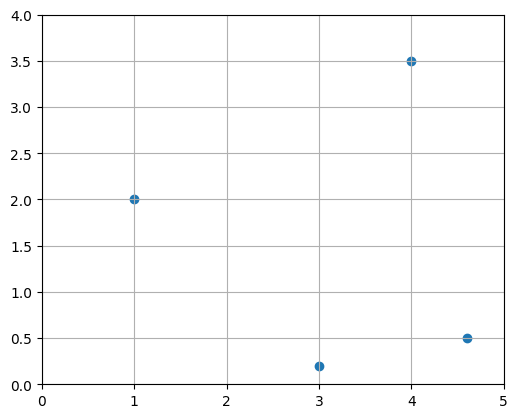

In [56]:
import matplotlib.pyplot as plt

P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

Of course, we could also have stored the same 4 vectors as row vectors instead of column vectors, resulting in a $4 \times 2$ matrix (the transpose of $P$, in fact). It is really an arbitrary choice.

Since the vectors are ordered, you can see the matrix as a path and represent it with connected dots:

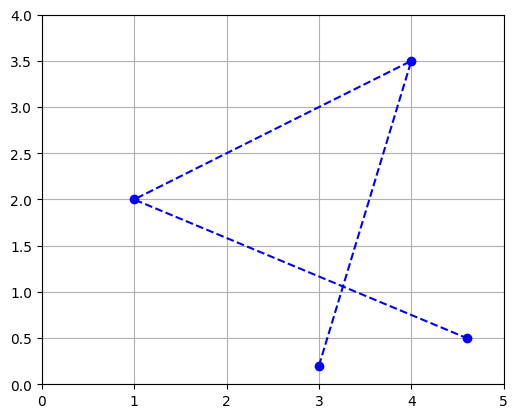

In [57]:
plt.plot(x_coords_P, y_coords_P, "bo")
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

Or you can represent it as a polygon: matplotlib's `Polygon` class expects an $n \times 2$ NumPy array, not a $2 \times n$ array, so we just need to give it $P^T$:

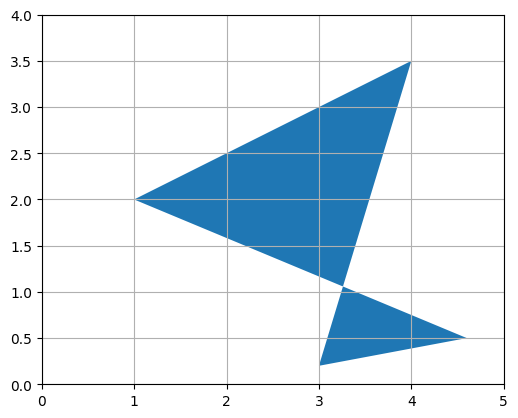

In [58]:
from matplotlib.patches import Polygon  # Importing the Polygon class from matplotlib.patches module
plt.gca().add_artist(Polygon(P.T))  # Adding the Polygon to the current axes (gca) with its transpose (P.T)
plt.axis([0, 5, 0, 4])  # Setting the x-axis and y-axis limits to define the plot boundaries
plt.gca().set_aspect("equal")  # Setting the aspect ratio of the plot to equal, ensuring equal scaling in x and y directions
plt.grid()  # Adding grid lines to the plot
plt.show()  # Displaying the plot


###  10. Geometric applications of matrix operations
Earlier in [part1 vector series](https://vmlverse.github.io/posts/2023/06/29/Maths_LinearAlgebra.html) we saw that vector addition results in a geometric translation, vector multiplication by a scalar results in rescaling (zooming in or out, centered on the origin), and vector dot product results in projecting a vector onto another vector, rescaling and measuring the resulting coordinate.

Similarly, matrix operations have very useful geometric applications.

#### a. Addition = multiple geometric translations
First, adding two matrices together is equivalent to adding all their vectors together. For example, let's create a $2 \times 4$ matrix $H$ and add it to $P$, and look at the result:

In [59]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

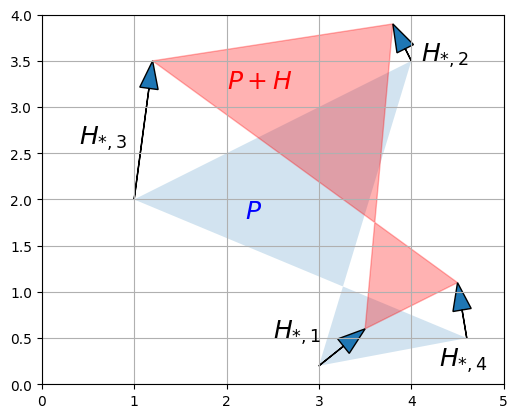

In [60]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.3, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

#### b. Scalar multiplication
Multiplying a matrix by a scalar results in all its vectors being multiplied by that scalar, so unsurprisingly, the geometric result is a rescaling of the entire figure. For example, let's rescale our polygon by a factor of 60% (zooming out, centered on the origin):

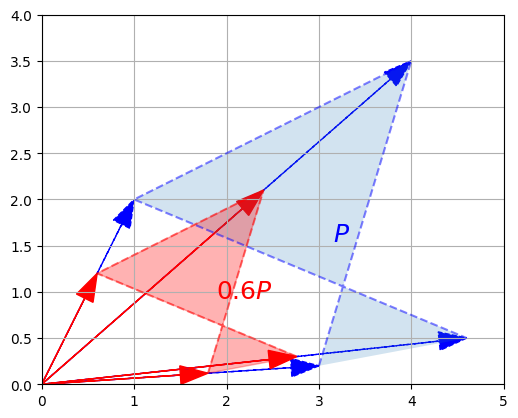

In [61]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.plot(P_before[0], P_before[1], "b--", alpha=0.5)
    plt.plot(P_after[0], P_after[1], "r--", alpha=0.5)
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.gca().set_aspect("equal")
    plt.grid()

P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

#### c. Matrix multiplication – Projection onto an axis
Matrix multiplication is more complex to visualize, but it is also the most powerful tool in the box.

Let's start simple, by defining a $1 \times 2$ matrix $U = \begin{bmatrix} 1 & 0 \end{bmatrix}$. This row vector is just the horizontal unit vector.

In [62]:
U = np.array([[1, 0]])

Now let's look at the dot product $U \cdot P$:

In [63]:
P

array([[3. , 4. , 1. , 4.6],
       [0.2, 3.5, 2. , 0.5]])

In [64]:
U @ P

array([[3. , 4. , 1. , 4.6]])

These are the horizontal coordinates of the vectors in $P$. In other words, we just projected $P$ onto the horizontal axis:

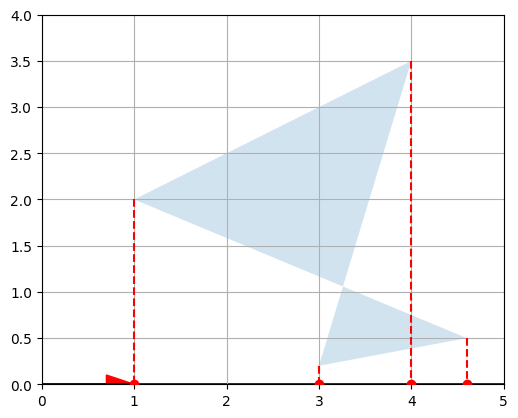

In [65]:
def plot_projection(U, P, axis=[0, 5, 0, 4]):
    U_P = U @ P  # Calculate the projection of P onto U using matrix multiplication

    axis_end = 100 * U  # Determine the end point of the axis for visualization purposes
    plot_vector2d(axis_end[0], color="black")  # Plot the axis represented by the vector axis_end

    plt.gca().add_artist(Polygon(P.T, alpha=0.2))  # Add a polygon representing P to the plot with transparency

    # Iterate over the columns of P and U_P simultaneously
    for vector, proj_coordinate in zip(P.T, U_P.T):
        proj_point = proj_coordinate * U  # Calculate the projected point by scaling U with the projection coordinate
        plt.plot(proj_point[0][0], proj_point[0][1], "ro", zorder=10)  # Plot the projected point as a red dot
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]],
                 "r--", zorder=10)  # Plot a dashed line connecting the original point to the projected point

    plt.axis(axis)  # Set the x-axis and y-axis limits for the plot
    plt.gca().set_aspect("equal")  # Set the aspect ratio of the plot to ensure equal scaling in x and y directions
    plt.grid()  # Add grid lines to the plot
    plt.show()  # Display the plot


plot_vector2d(U[0,:], color="r")
plot_projection(U, P)

We can actually project on any other axis by just replacing $U$ with any other unit vector. For example, let's project on the axis that is at a 30° angle above the horizontal axis:

First, we are calculating the angle `angle30` in radians.

Then, we are creating a 2-dimensional NumPy array `U_30` that represents a vector with a magnitude of `1` and an angle of `30` degrees (or `angle30` in radians). Here's how it works:
- `np.cos(angle30)` returns the cosine of `angle30`. This gives us the x-component of the unit vector.
- `np.sin(angle30)` returns the sine of `angle30`. This gives us the y-component of the unit vector.
- `[[np.cos(angle30), np.sin(angle30)]]` creates a 2-dimensional array with the x-component as the first element and the y-component as the second element.
- Finally, the whole array is assigned to the variable `U_30`.


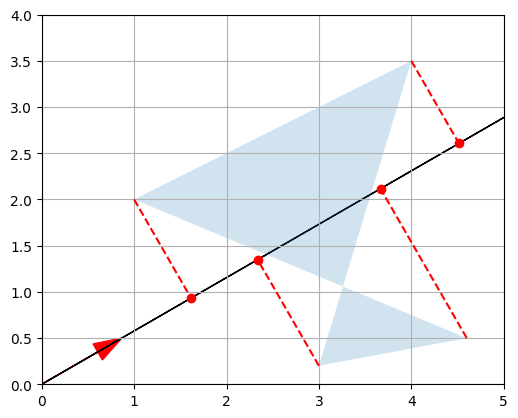

In [66]:
angle30 = 30 * np.pi / 180  # calculate 30 degree angle in radians
U_30 = np.array([[np.cos(angle30), np.sin(angle30)]])
plot_vector2d(U_30[0,:], color="r")
plot_projection(U_30, P)

Good! Remember that the dot product of a unit vector and a matrix basically performs a projection on an axis and gives us the coordinates of the resulting points on that axis.

#### d. Matrix multiplication – Rotation
Now let's create a $2 \times 2$ matrix $V$ containing two unit vectors that make 30° and 120° angles with the horizontal axis:

$V = \begin{bmatrix} \cos(30°) & \sin(30°) \\ \cos(120°) & \sin(120°) \end{bmatrix}$

In [67]:
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])
V

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

Let's look at the product $VP$:

In [68]:
V @ P

array([[ 2.69807621,  5.21410162,  1.8660254 ,  4.23371686],
       [-1.32679492,  1.03108891,  1.23205081, -1.8669873 ]])

* The first row is equal to $V_{1,*} P$, which is the coordinates of the projection of $P$ onto the 30° axis, as we have seen above.
* The second row is $V_{2,*} P$, which is the coordinates of the projection of $P$ onto the 120° axis.
* So basically we obtained the coordinates of $P$ after rotating the horizontal and vertical axes by 30° (or equivalently after rotating the polygon by -30° around the origin)! Let's plot $VP$ to see this:

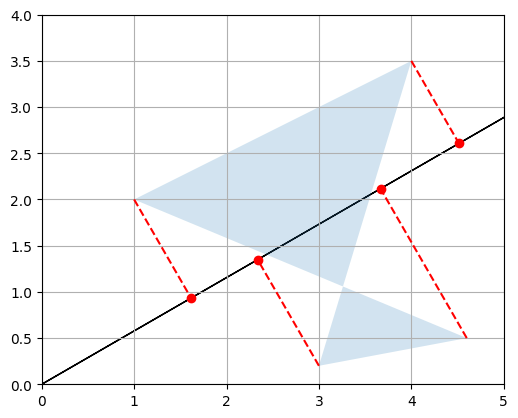

In [69]:
plot_projection(np.array([V[0,:]]), P)

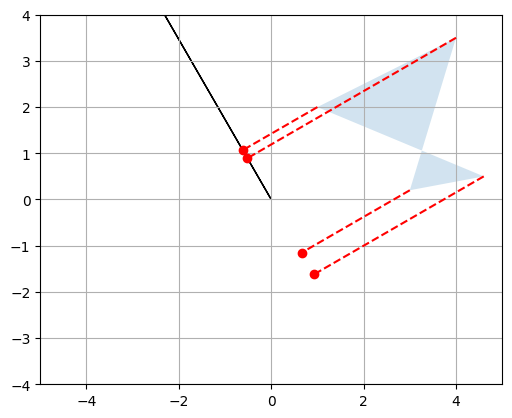

In [70]:
plot_projection(np.array([V[1,:]]), P, axis=[-5, 5, -4, 4])

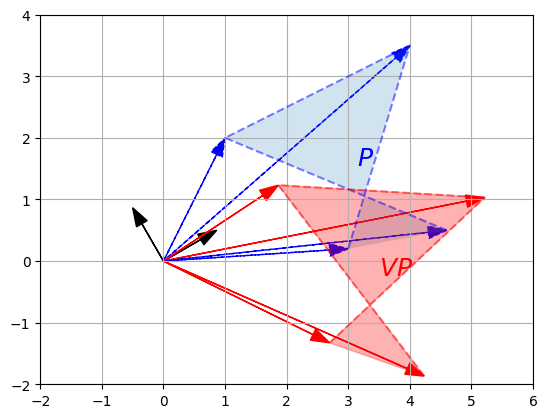

In [71]:
P_rotated = V @ P

plot_vector2d(V[0,:], color="black")
plot_vector2d(V[1,:], color="black")
plot_transformation(P, P_rotated, "$P$", "$VP$", [-2, 6, -2, 4], arrows=True)
plt.show()

Matrix $V$ is called a **rotation matrix**.

#### e. Matrix multiplication – Other linear transformations
More generally, any linear transformation $f$ that maps n-dimensional vectors to m-dimensional vectors can be represented as an $m \times n$ matrix. For example, say $\textbf{u}$ is a 3-dimensional vector:

$\textbf{u} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$

and $f$ is defined as:

$f(\textbf{u}) = \begin{pmatrix}
ax + by + cz \\
dx + ey + fz
\end{pmatrix}$

This transformation $f$ maps 3-dimensional vectors to 2-dimensional vectors in a linear way (i.e. the resulting coordinates only involve sums of multiples of the original coordinates). We can represent this transformation as matrix $F$:

$F = \begin{bmatrix}
a & b & c \\
d & e & f
\end{bmatrix}$

Now, to compute $f(\textbf{u})$ we can simply do a matrix multiplication:

$f(\textbf{u}) = F \textbf{u}$

If we have a matrix $G = \begin{bmatrix}\textbf{u}_1 & \textbf{u}_2 & \cdots & \textbf{u}_q \end{bmatrix}$, where each $\textbf{u}_i$ is a 3-dimensional column vector, then $FG$ results in the linear transformation of all vectors $\textbf{u}_i$ as defined by the matrix $F$:

$FG = \begin{bmatrix}f(\textbf{u}_1) & f(\textbf{u}_2) & \cdots & f(\textbf{u}_q) \end{bmatrix}$

To summarize, the matrix on the left-hand side of a dot product specifies what linear transformation to apply to the right-hand side vectors. We have already shown that this can be used to perform projections and rotations, but any other linear transformation is possible. For example, here is a transformation known as a *shear mapping*:

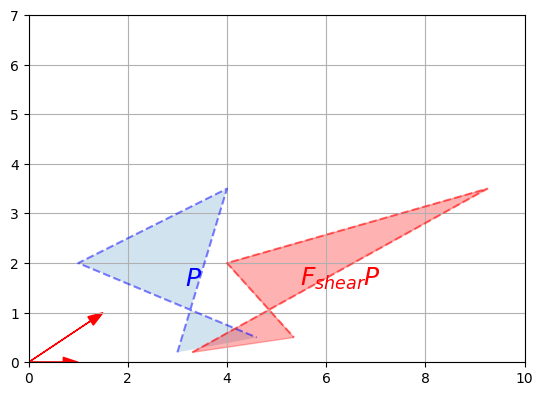

In [72]:
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])

plot_vector2d(F_shear[:,0], color="r")
plot_vector2d(F_shear[:,1], color="r")
plot_transformation(P, F_shear @ P, "$P$", "$F_{shear} P$",
                    axis=[0, 10, 0, 7])
plt.show()

Let's look at how this transformation affects the **unit square**:

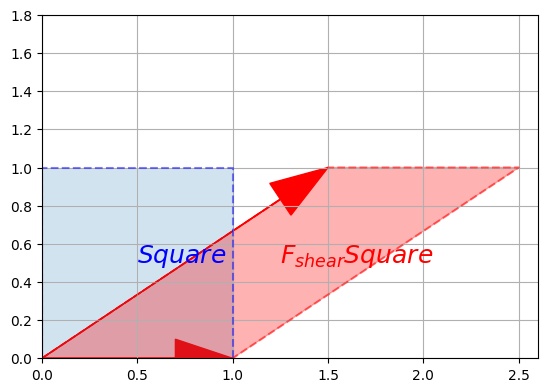

In [73]:
Square = np.array([
        [0, 0, 1, 1],
        [0, 1, 1, 0]
    ])

#Note P is represented as a 2x4 matrix where row1 contains x-values and row2 contains Y values.
#To align with P, we want our transformataion matrix setup the same way. i.e., row1-x-values and row2-y values.
#This is the reason why we are plotting F_shear[:,0] - column1 with row1 (x-values) and row2 (y-values).
#Therefore F_shear[:,0] (column 1) is the first transformation axis instead of original x-axis.
#Therefore F_shear[:,1] (column 2) is the second transformation axis instead of original x-axis.
plot_vector2d(F_shear[:,0], color="r")
plot_vector2d(F_shear[:,1], color="r")
plot_transformation(Square, F_shear @ Square, "$Square$", "$F_{shear} Square$",
                    axis=[0, 2.6, 0, 1.8])
plt.show()

Now let's look at a **squeeze mapping**:

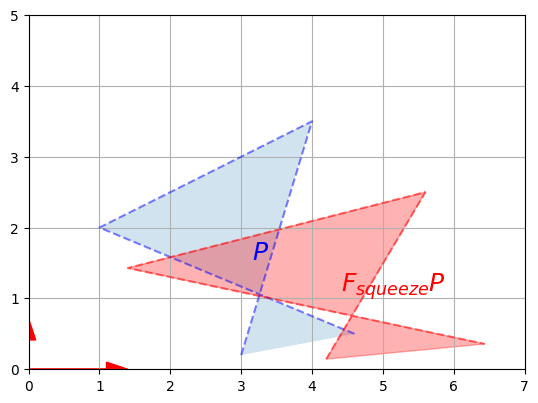

In [74]:
F_squeeze = np.array([
        [1.4, 0],
        [0, 1/1.4]
    ])

plot_vector2d(F_squeeze[:,0], color="r")
plot_vector2d(F_squeeze[:,1], color="r")
plot_transformation(P, F_squeeze @ P, "$P$", "$F_{squeeze} P$",
                    axis=[0, 7, 0, 5])
plt.show()

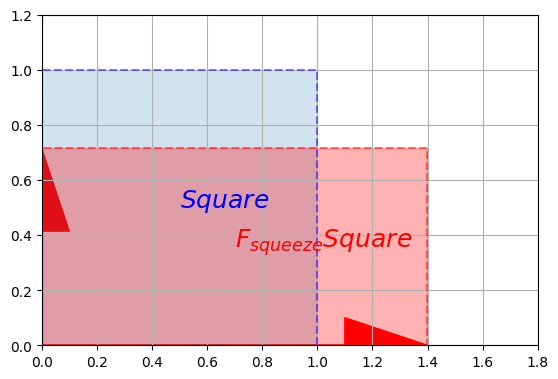

In [75]:
plot_vector2d(F_squeeze[:,0], color="r")
plot_vector2d(F_squeeze[:,1], color="r")
plot_transformation(Square, F_squeeze @ Square, "$Square$", "$F_{squeeze} Square$",
                    axis=[0, 1.8, 0, 1.2])
plt.show()

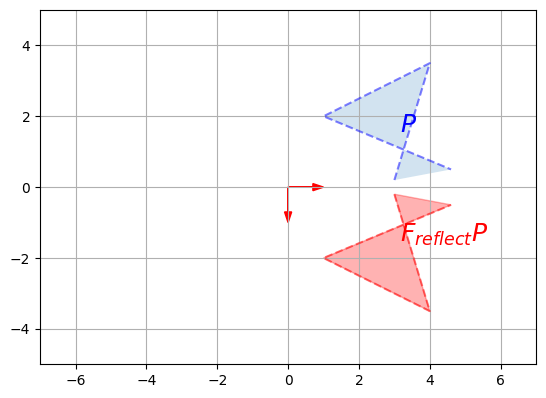

In [76]:
F_reflect = np.array([
        [1, 0],
        [0, -1]
    ])

plot_vector2d(F_reflect[:,0], color="r")
plot_vector2d(F_reflect[:,1], color="r")
plot_transformation(P, F_reflect @ P, "$P$", "$F_{reflect} P$",
                    axis=[-7, 7, -5, 5])
plt.show()

### 11. Matrix inverse
* Now that we understand that a matrix can represent any linear transformation, a natural question is: can we find a transformation matrix that reverses the effect of a given transformation matrix $F$? The answer is yes… sometimes! When it exists, such a matrix is called the **inverse** of $F$, and it is noted $F^{-1}$.

For example, the rotation, the shear mapping and the squeeze mapping above all have inverse transformations. Let's demonstrate this on the shear mapping:

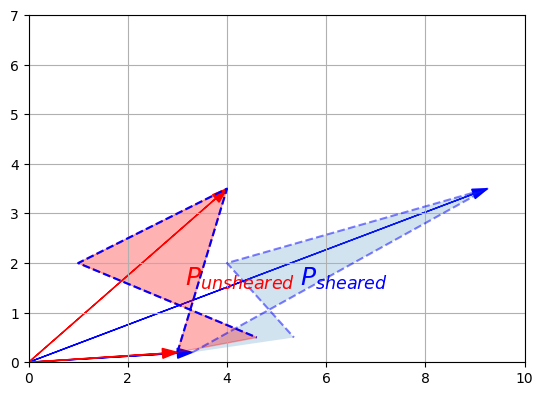

In [77]:
F_inv_shear = np.array([
    [1, -1.5],
    [0, 1]
])
P_sheared = F_shear @ P
P_unsheared = F_inv_shear @ P_sheared
plot_vector2d(P_sheared[:,0], color="blue")
plot_vector2d(P_sheared[:,1], color="blue")
plot_vector2d(P_unsheared[:,0], color="red")
plot_vector2d(P_unsheared[:,1], color="red")
plot_transformation(P_sheared, P_unsheared, "$P_{sheared}$", "$P_{unsheared}$",
                    axis=[0, 10, 0, 7])
plt.plot(P[0], P[1], "b--")
plt.show()

We applied a shear mapping on $P$, just like we did before, but then we applied a second transformation to the result, and *lo and behold* this had the effect of coming back to the original $P$ (I've plotted the original $P$'s outline to double-check). The second transformation is the inverse of the first one.

We defined the inverse matrix $F_{shear}^{-1}$ manually this time, but NumPy provides an `inv` function to compute a matrix's inverse, so we could have written instead:

In [78]:
import numpy.linalg as LA
F_inv_shear = LA.inv(F_shear)
F_inv_shear

array([[ 1. , -1.5],
       [ 0. ,  1. ]])

Only square matrices can be inversed. This makes sense when you think about it: if you have a transformation that reduces the number of dimensions, then some information is lost and there is no way that you can get it back. For example say you use a $2 \times 3$ matrix to project a 3D object onto a plane. The result may look like this:

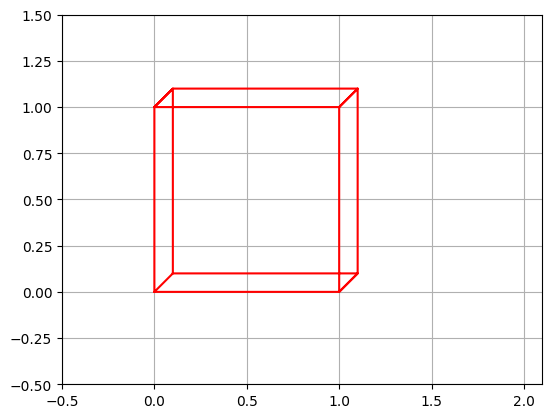

In [79]:
plt.plot([0, 0, 1, 1, 0, 0.1, 0.1, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1],
         [0, 1, 1, 0, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1, 0, 0.1, 0.1],
         "r-")
plt.axis([-0.5, 2.1, -0.5, 1.5])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

Looking at this image, it is impossible to tell whether this is the projection of a cube or the projection of a narrow rectangular object. Some information has been lost in the projection.

#### Singular or Degenerate Matrix
Even square transformation matrices can lose information. For example, consider this transformation matrix:

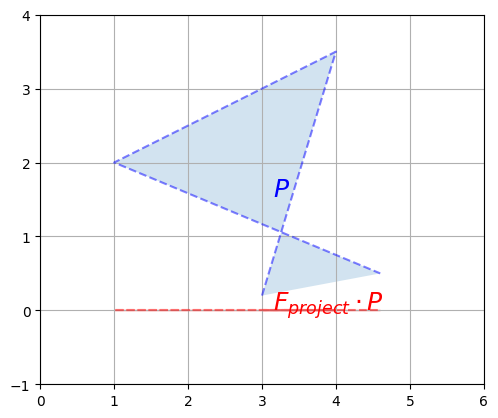

In [80]:
F_project = np.array([
        [1, 0],
        [0, 0]
    ])
plot_transformation(P, F_project @ P, "$P$", r"$F_{project} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

This transformation matrix performs a projection onto the horizontal axis. Our polygon gets entirely flattened out so some information is entirely lost, and it is impossible to go back to the original polygon using a linear transformation. In other words, $F_{project}$ has no inverse. Such a square matrix that cannot be inversed is called a **singular matrix** (aka degenerate matrix). If we ask NumPy to calculate its inverse, it raises an exception:

In [81]:
try:
    LA.inv(F_project)
except LA.LinAlgError as e:
    print("LinAlgError:", e)

LinAlgError: Singular matrix


Here is another example of a singular matrix. This one performs a projection onto the axis at a 30° angle above the horizontal axis:

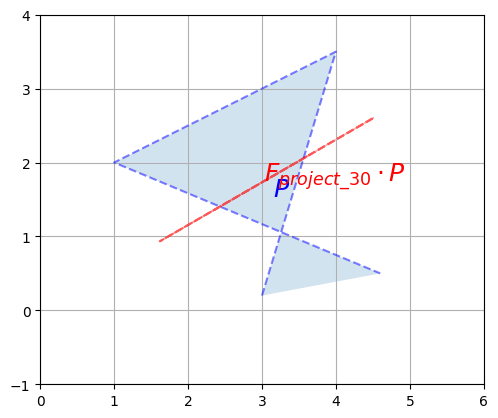

In [82]:
angle30 = 30 * np.pi / 180
F_project_30 = np.array([
               [np.cos(angle30)**2, np.sin(2*angle30)/2],
               [np.sin(2*angle30)/2, np.sin(angle30)**2]
         ])
plot_transformation(P, F_project_30 @ P, "$P$", r"$F_{project\_30} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

But this time, due to floating point rounding errors, NumPy manages to calculate an inverse (notice how large the elements are, though):

In [83]:
LA.inv(F_project_30)

array([[ 1.20095990e+16, -2.08012357e+16],
       [-2.08012357e+16,  3.60287970e+16]])

As you might expect, the dot product of a matrix by its inverse results in the identity matrix:

$M \cdot M^{-1} = M^{-1} \cdot M = I$

This makes sense since doing a linear transformation followed by the inverse transformation results in no change at all.

In [84]:
LA.inv(LA.inv(F_shear))

array([[1. , 1.5],
       [0. , 1. ]])

Also, the inverse of scaling by a factor of $\lambda$ is of course scaling by a factor of $\frac{1}{\lambda}$:

$ (\lambda \times M)^{-1} = \frac{1}{\lambda} \times M^{-1}$

Once you understand the geometric interpretation of matrices as linear transformations, most of these properties seem fairly intuitive.

#### Involution
A matrix that is its own inverse is called an **involution**. The simplest examples are reflection matrices, or a rotation by 180°, but there are also more complex involutions, for example imagine a transformation that squeezes horizontally, then  reflects over the vertical axis and finally rotates by 90° clockwise. Pick up a napkin and try doing that twice: you will end up in the original position. Here is the corresponding involutory matrix:

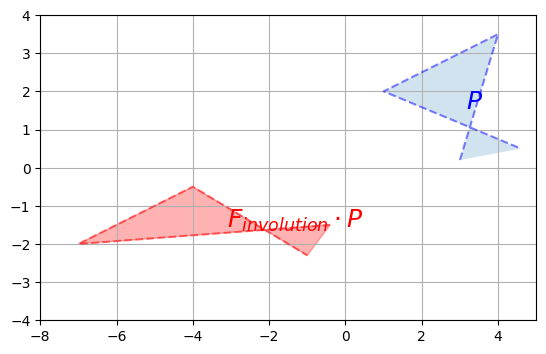

In [85]:
F_involution  = np.array([
        [0, -2],
        [-1/2, 0]
    ])
plot_transformation(P, F_involution @ P, "$P$", r"$F_{involution} \cdot P$",
                    axis=[-8, 5, -4, 4])
plt.show()

In [86]:
#inverse of an involution is itself
LA.inv(F_involution)

array([[-0. , -2. ],
       [-0.5, -0. ]])

#### Orthogonal Matrix
Finally, a square matrix $H$ whose inverse is its own transpose is an **orthogonal matrix**:

$H^{-1} = H^T$

Therefore:

$H \cdot H^T = H^T \cdot H = I$

It corresponds to a transformation that preserves distances, such as rotations and reflections, and combinations of these, but not rescaling, shearing or squeezing.  Let's check that $F_{reflect}$ is indeed orthogonal:

In [87]:
F_reflect

array([[ 1,  0],
       [ 0, -1]])

In [88]:
# matrix with transpose matrix results in identity matrix
F_reflect @ F_reflect.T

array([[1, 0],
       [0, 1]])

In [89]:
#inverse of a matrix is equal to transpose of the matrix - orthogonal
LA.inv(F_reflect) == F_reflect.T

array([[ True,  True],
       [ True,  True]])

An orthogonal matrix satisfies two key properties: orthogonality and normalization.

Orthogonality: The columns (or rows) of an orthogonal matrix are mutually orthogonal, meaning they are all perpendicular to each other. This implies that the dot product between any two distinct columns (or rows) of the matrix is zero.

Normalization: Each column (or row) of an orthogonal matrix has a magnitude of 1. This means that the dot product of any column (or row) with itself is equal to 1.



In [90]:
#proving orthogonality property
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(cos_theta.clip(-1, 1))

theta = vector_angle(F_reflect[:,0], F_reflect[:,1]) #columns
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

theta = vector_angle(F_reflect[0,:], F_reflect[1,:]) #rows
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 1.5707963267948966 radians
      = 90.0 degrees
Angle = 1.5707963267948966 radians
      = 90.0 degrees


In [91]:
#proving normalization property
print("Norm =", LA.norm(F_reflect[:,0])) #column
print("Norm =", LA.norm(F_reflect[:,1])) #column
print("Norm =", LA.norm(F_reflect[0,:])) #row
print("Norm =", LA.norm(F_reflect[1,:])) #row

Norm = 1.0
Norm = 1.0
Norm = 1.0
Norm = 1.0


Geometrically, an orthogonal matrix represents a linear transformation that preserves lengths and angles. When an orthogonal matrix is applied to a vector, the resulting transformed vector maintains its length and the angle it forms with other vectors.

Orthogonal matrices have several important properties and applications in linear algebra and related fields. Some key properties include:

* They preserve distances and angles, making them useful in geometric transformations.
* They have determinant ±1, which means they do not distort the volume of a shape.
* They provide an efficient way to solve linear systems of equations.
* They diagonalize symmetric matrices, simplifying various calculations and analyses.


### 12. Determinant
The determinant of a square matrix $M$, noted $\det(M)$ or $\det M$ or $|M|$ is a value that can be calculated from its elements $(M_{i,j})$ using various equivalent methods. One of the simplest methods is this recursive approach:

$|M| = M_{1,1}\times|M^{(1,1)}| - M_{1,2}\times|M^{(1,2)}| + M_{1,3}\times|M^{(1,3)}| - M_{1,4}\times|M^{(1,4)}| + \cdots ± M_{1,n}\times|M^{(1,n)}|$

* Where $M^{(i,j)}$ is the matrix $M$ without row $i$ and column $j$.

For example, let's calculate the determinant of the following $3 \times 3$ matrix:

$M = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 0
\end{bmatrix}$

Using the method above, we get:

$|M| = 1 \times \left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right |
     - 2 \times \left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right |
     + 3 \times \left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right |$

Now we need to compute the determinant of each of these $2 \times 2$ matrices (these determinants are called **minors**):

$\left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right | = 5 \times 0 - 6 \times 8 = -48$

$\left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right | = 4 \times 0 - 6 \times 7 = -42$

$\left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right | = 4 \times 8 - 5 \times 7 = -3$

Now we can calculate the final result:

$|M| = 1 \times (-48) - 2 \times (-42) + 3 \times (-3) = 27$

To get the determinant of a matrix, you can call NumPy's `det` function in the `numpy.linalg` module:

In [92]:
M = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ])
LA.det(M)

27.0

One of the main uses of the determinant is to *determine* whether a square matrix can be inversed or not: if the determinant is equal to 0, then the matrix *cannot* be inversed (it is a singular matrix), and if the determinant is not 0, then it *can* be inversed.

For example, let's compute the determinant for the $F_{project}$, $F_{project\_30}$ and $F_{shear}$ matrices that we defined earlier:

In [93]:
LA.det(F_project)

0.0

That's right, $F_{project}$ is singular, as we saw earlier.

In [94]:
LA.det(F_project_30)

2.0816681711721642e-17

This determinant is suspiciously close to 0: it really should be 0, but it's not due to tiny floating point errors. The matrix is actually singular.

In [95]:
LA.det(F_shear)

1.0

Perfect! This matrix *can* be inversed as we saw earlier. Wow, math really works!

The determinant can also be used to measure how much a linear transformation affects surface areas: for example, the projection matrices $F_{project}$ and $F_{project\_30}$ completely flatten the polygon $P$, until its area is zero. This is why the determinant of these matrices is 0. The shear mapping modified the shape of the polygon, but it did not affect its surface area, which is why the determinant is 1. You can try computing the determinant of a rotation matrix, and you should also find 1. What about a scaling matrix? Let's see:

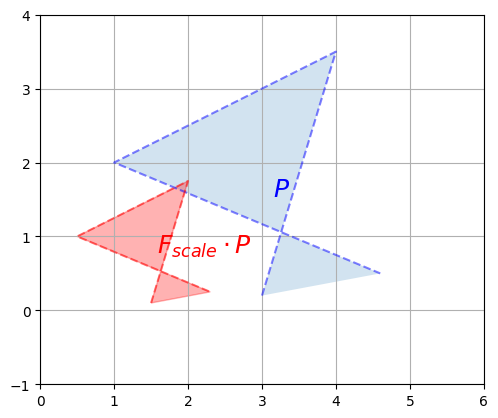

In [96]:
F_scale = np.array([
        [0.5, 0],
        [0, 0.5]
    ])
plot_transformation(P, F_scale @ P, "$P$", r"$F_{scale} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

We rescaled the polygon by a factor of 1/2 on both vertical and horizontal axes so the surface area of the resulting polygon is 1/4$^{th}$ of the original polygon. Let's compute the determinant and check that:

In [97]:
LA.det(F_scale)

0.25

Correct!

The determinant can actually be negative, when the transformation results in a "flipped over" version of the original polygon (e.g. a left-hand glove becomes a right-hand glove). For example, the determinant of the `F_reflect` matrix is -1 because the surface area is preserved but the polygon gets flipped over:

In [98]:
LA.det(F_reflect)

-1.0

### 13. Composing linear transformations
Several linear transformations can be chained simply by performing multiple dot products in a row. For example, to perform a squeeze mapping followed by a shear mapping, just write:

In [99]:
P_squeezed_then_sheared = F_shear @ (F_squeeze @ P)

Since the dot product is associative, the following code is equivalent:

In [100]:
P_squeezed_then_sheared = F_shear @ F_squeeze @ P

Note that the order of the transformations is the reverse of the dot product order.

If we are going to perform this composition of linear transformations more than once, we might as well save the composition matrix like this:

In [101]:
F_squeeze_then_shear = F_shear @ F_squeeze
P_squeezed_then_sheared = F_squeeze_then_shear @ P

From now on we can perform both transformations in just one dot product, which can lead to a very significant performance boost.

What if you want to perform the inverse of this double transformation? Well, if you squeezed and then you sheared, and you want to undo what you have done, it should be obvious that you should unshear first and then unsqueeze. In more mathematical terms, given two invertible (aka nonsingular) matrices $Q$ and $R$:

$(Q \cdot R)^{-1} = R^{-1} \cdot Q^{-1}$

And in NumPy:

In [102]:
LA.inv(F_shear @ F_squeeze) == LA.inv(F_squeeze) @ LA.inv(F_shear)

array([[ True,  True],
       [ True,  True]])

### 14. Singular Value Decomposition
It turns out that any $m \times n$ matrix $M$ can be decomposed into the dot product of three simple matrices:
* a rotation matrix $U$ (an $m \times m$ orthogonal matrix)
* a scaling & projecting matrix $\Sigma$ (an $m \times n$ diagonal matrix)
* and another rotation matrix $V^T$ (an $n \times n$ orthogonal matrix)

$M = U \cdot \Sigma \cdot V^{T}$

For example, let's decompose the shear transformation:

In [103]:
U, S_diag, V_T = LA.svd(F_shear) # note: in python 3 you can rename S_diag to Σ_diag
U

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [104]:
S_diag

array([2. , 0.5])

Note that this is just a 1D array containing the diagonal values of Σ. To get the actual matrix Σ, we can use NumPy's `diag` function:

In [105]:
S = np.diag(S_diag)
S

array([[2. , 0. ],
       [0. , 0.5]])

Now let's check that $U \cdot \Sigma \cdot V^T$ is indeed equal to `F_shear`:

In [106]:
U @ np.diag(S_diag) @ V_T

array([[ 1.00000000e+00,  1.50000000e+00],
       [-1.25949234e-17,  1.00000000e+00]])

In [107]:
F_shear

array([[1. , 1.5],
       [0. , 1. ]])

It worked like a charm. Let's apply these transformations one by one (in reverse order) on the unit square to understand what's going on. First, let's apply the first rotation $V^T$:

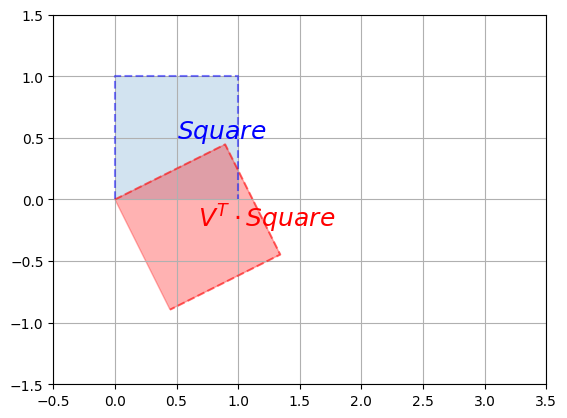

In [108]:
plot_transformation(Square, V_T @ Square, "$Square$", r"$V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Now let's rescale along the vertical and horizontal axes using $\Sigma$:

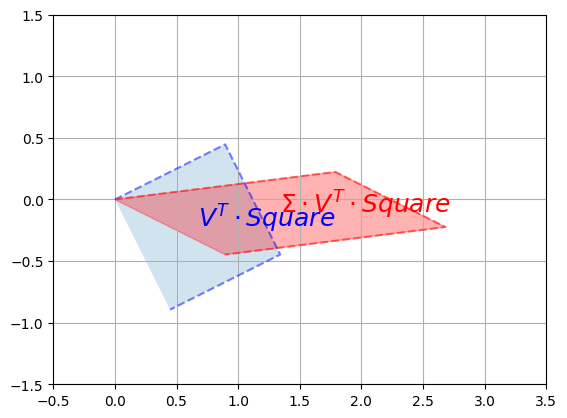

In [109]:
plot_transformation(V_T @ Square, S @ V_T @ Square,
                    r"$V^T \cdot Square$",
                    r"$\Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Finally, we apply the second rotation $U$:

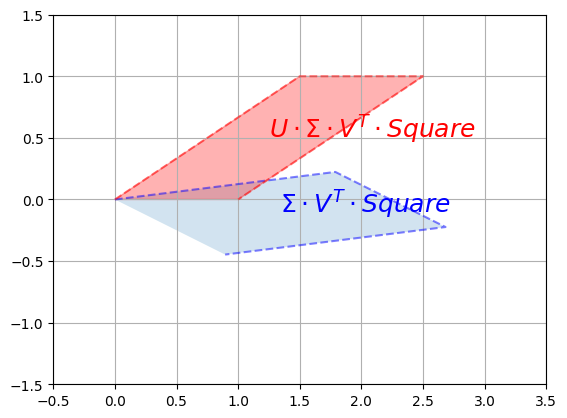

In [110]:
plot_transformation(S @ V_T @ Square, U @ S @ V_T @ Square,
                    r"$\Sigma \cdot V^T \cdot Square$",
                    r"$U \cdot \Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

And we can see that the result is indeed a shear mapping of the original unit square.

You might ask, well how is this SVD used in Machine Learning? Here are a few use cases on how SVD applies to Machine learning.

1. SVD is used in machine learning for dimensionality reduction, extracting important features from high-dimensional data.
2. It powers collaborative filtering, enabling recommendations by approximating missing entries in user-item matrices.
3. SVD facilitates image compression by separating images into singular vectors and values, reducing data while maintaining quality.
4. In natural language processing, it uncovers latent topics in documents for tasks like clustering and retrieval.
5. SVD aids noise reduction in signals and denoising images by modifying singular values and vectors.
6. Overall, SVD enables efficient data representation, dimensionality reduction, and extracting meaningful information in various machine learning applications.

### 15. Eigenvectors and eigenvalues
* Intuitively, eigenvectors and eigenvalues provide insights into the behavior of linear transformations or matrices.
* An **eigenvector** (also called a **characteristic vector**) of a square matrix 𝑀 is a non-zero vector that, when multiplied by 𝑀, results in a scaled version of the original vector.
* The scaling factor is called the eigenvalue corresponding to that eigenvector.
* A more formal definition is any vector $v$ such that:  
$M \cdot v = \lambda \times v$  
Where $\lambda$ is a scalar value called the **eigenvalue** associated to the vector $v$.
* In other words, the linear transformation represented by 𝑀 only stretches or compresses the eigenvector, without changing its direction.
* In other words:  
(linear transformation matrix M) . (base vectors) = (scaling factor) . (base vectors)

In simpler terms, *eigenvectors tell us the directions that are preserved by a transformation*, and *eigenvalues provide the scale at which these directions are stretched or compressed*. By analyzing eigenvectors and eigenvalues, we gain insights into the fundamental geometric properties of the linear transformation or matrix and how it affects vectors in space.

For example, any horizontal vector remains horizontal after applying the shear mapping (as you can see on the image above), so it is an eigenvector of $M$. A vertical vector ends up tilted to the right, so vertical vectors are *NOT* eigenvectors of $M$.

If we look at the squeeze mapping, we find that any horizontal or vertical vector keeps its direction (although its length changes), so all horizontal and vertical vectors are eigenvectors of $F_{squeeze}$.

However, rotation matrices have no eigenvectors at all (except if the rotation angle is 0° or 180°, in which case all non-zero vectors are eigenvectors).

NumPy's `eig` function returns the list of unit eigenvectors and their corresponding eigenvalues for any square matrix. Let's look at the eigenvectors and eigenvalues of the squeeze mapping matrix $F_{squeeze}$:

In [111]:
eigenvalues, eigenvectors = LA.eig(F_squeeze)
eigenvalues # [λ0, λ1, …]

array([1.4       , 0.71428571])

In [112]:
eigenvectors # [v0, v1, …]

array([[1., 0.],
       [0., 1.]])

Indeed, the horizontal vectors are stretched by a factor of 1.4, and the vertical vectors are shrunk by a factor of 1/1.4=0.714…, so far so good.  Plotting the eigen vectors, we get:

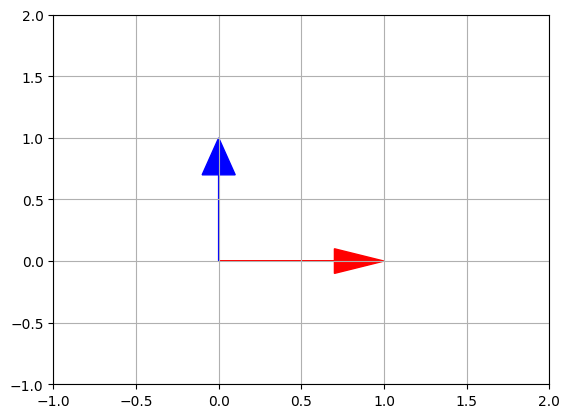

In [133]:
plot_vector2d(eigenvectors[:,0], color="r")
plot_vector2d(eigenvectors[:,1], color="b")
plt.axis([-1, 2, -1, 2])
plt.grid()
plt.show()

Let's look at the shear mapping matrix $F_{shear}$:

In [125]:
eigenvalues2, eigenvectors2 = LA.eig(F_shear)
eigenvalues2 # [λ0, λ1, …]

array([1., 1.])

In [130]:
eigenvectors2 # [v0, v1, …]

array([[ 1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  1.48029737e-16]])

Wait, what!? We expected just one unit eigenvector, not two. The second vector is almost equal to $\begin{pmatrix}-1 \\ 0 \end{pmatrix}$, which is on the same line as the first vector $\begin{pmatrix}1 \\ 0 \end{pmatrix}$. This is due to floating point errors. We can safely ignore vectors that are (almost) collinear (i.e. on the same line).

Plotting those eigen vectors, we get:

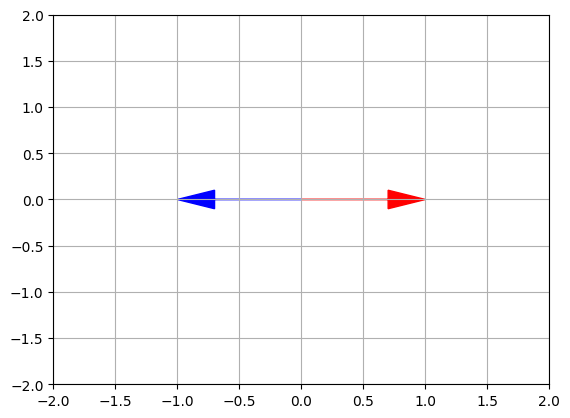

In [129]:
plot_vector2d(eigenvectors2[:,0], color="r")
plot_vector2d(eigenvectors2[:,1], color="b")
plt.axis([-2, 2, -2, 2])
plt.grid()
plt.show()

The first eigenvector [1, 0] remains unchanged, while the second eigenvector [-1,0] lies on the same line after the transformation. This implies that F_shear has only one eigenvector. Thus the linear transformation matrix $F_{shear}$ preserves only one vector from the original axis.






### 16. Trace
The trace of a square matrix $M$, noted $tr(M)$ is the sum of the values on its main diagonal. For example:

In [134]:
D = np.array([
        [100, 200, 300],
        [ 10,  20,  30],
        [  1,   2,   3],
    ])
D.trace()

123

The trace does not have a simple geometric interpretation (in general), but it has a number of properties that make it useful in many areas:
* $tr(A + B) = tr(A) + tr(B)$
* $tr(A \cdot B) = tr(B \cdot A)$
* $tr(A \cdot B \cdot \cdots \cdot Y \cdot Z) = tr(Z \cdot A \cdot B \cdot \cdots \cdot Y)$
* $tr(A^T \cdot B) = tr(A \cdot B^T) = tr(B^T \cdot A) = tr(B \cdot A^T) = \sum_{i,j}X_{i,j} \times Y_{i,j}$
* …

It does, however, have a useful geometric interpretation in the case of projection matrices (such as $F_{project}$ that we discussed earlier): it corresponds to the number of dimensions after projection. For example:

In [138]:
F_project

array([[1, 0],
       [0, 0]])

In [137]:
F_project.trace()

1

Intuitively, you can think of the trace as a quantity that captures the "total effect" or "accumulated impact" of a matrix.

## References

*   [Book: Deep Learning Book - Ian Goodfellow and Yoshua Bengio and Aaron Courville](https://www.deeplearningbook.org/)
*   Book: Hands-On Machine Learning with Scikit-Learn and TensorFlow - Aurélien Géron
* [ageron github | handson-ml3](https://github.com/ageron/handson-ml3/blob/main/math_linear_algebra.ipynb)
* [Khan Academy - Linear Algebra](https://www.khanacademy.org/math/linear-algebra)
* [Essence of linear algebra - 3Blue1Brown YouTube Series](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&ab_channel=3Blue1Brown)

